# On the shoulders of giants

Hi there!

Last time, we managed to get our [hotdog detector] to around 0.20 loss, which translated into 92% accuracy. But Jian-Yang is not yet happy- we won't rest until we reach at least 95%!
[VGG16]

[hotdog detector]: https://www.youtube.com/watch?v=ACmydtFDTGs
[VGG16]: https://arxiv.org/abs/1409.1556

In [1]:
import keras
from keras import backend as K
from keras.applications import VGG16

vgg = VGG16(weights='imagenet', 
            include_top=False, 
            input_shape=(120,120,3))

Using TensorFlow backend.


In [3]:
from keras.layers import Dense, Flatten

model = keras.Sequential()
vgg.trainable = False
model.add(vgg)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 15,329,473
Trainable params: 614,785
Non-trainable params: 14,714,688
__________________________________________________________

In [4]:
from keras.preprocessing.image import ImageDataGenerator
import os

base_dir = 'data/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_datagen = ImageDataGenerator(rescale=1 / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1 / 255)

# Con batch size de 50 funcionaba mucho mejor, pero lo he tenido que bajar por memoria de la GPU
train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(120,120),
                                                    batch_size=100,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(120,120),
                                                        batch_size=100,
                                                        class_mode='binary')

Found 4765 images belonging to 2 classes.
Found 888 images belonging to 2 classes.


In [5]:
from keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-3),
                     metrics=['acc'])

history = model.fit_generator(train_generator,
                                 steps_per_epoch=30,
                                 epochs=30,
                                 validation_data=validation_generator,
                                 validation_steps=10)

Epoch 1/30
30/30 [==============================] - 78s 3s/step - loss: 0.3494 - acc: 0.8533 - val_loss: 0.2384 - val_acc: 0.9049
Epoch 2/30
30/30 [==============================] - 22s 727ms/step - loss: 0.2428 - acc: 0.9025 - val_loss: 0.1864 - val_acc: 0.9251
Epoch 3/30
30/30 [==============================] - 22s 747ms/step - loss: 0.2128 - acc: 0.9146 - val_loss: 0.1626 - val_acc: 0.9403
Epoch 4/30
30/30 [==============================] - 25s 820ms/step - loss: 0.1992 - acc: 0.9266 - val_loss: 0.1508 - val_acc: 0.9453
Epoch 5/30
30/30 [==============================] - 25s 841ms/step - loss: 0.2058 - acc: 0.9217 - val_loss: 0.1639 - val_acc: 0.9362
Epoch 6/30
30/30 [==============================] - 24s 814ms/step - loss: 0.1977 - acc: 0.9224 - val_loss: 0.1427 - val_acc: 0.9474
Epoch 7/30
30/30 [==============================] - 24s 812ms/step - loss: 0.1884 - acc: 0.9250 - val_loss: 0.1402 - val_acc: 0.9494
Epoch 8/30
30/30 [==============================] - 24s 798ms/step - los

In [6]:
model.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-4),
                     metrics=['acc'])

history_pt2 = model.fit_generator(train_generator,
                                 steps_per_epoch=30,
                                 epochs=30,
                                 validation_data=validation_generator,
                                 validation_steps=10)

model.save('vgg_frozen_convbase.h5')

Epoch 1/30
30/30 [==============================] - 29s 969ms/step - loss: 0.1279 - acc: 0.9525 - val_loss: 0.1501 - val_acc: 0.9393
Epoch 2/30
30/30 [==============================] - 25s 824ms/step - loss: 0.1394 - acc: 0.9473 - val_loss: 0.1432 - val_acc: 0.9443
Epoch 3/30
30/30 [==============================] - 25s 818ms/step - loss: 0.1162 - acc: 0.9565 - val_loss: 0.1352 - val_acc: 0.9474
Epoch 4/30
30/30 [==============================] - 25s 833ms/step - loss: 0.1368 - acc: 0.9466 - val_loss: 0.1409 - val_acc: 0.9474
Epoch 5/30
30/30 [==============================] - 25s 824ms/step - loss: 0.1224 - acc: 0.9493 - val_loss: 0.1363 - val_acc: 0.9484
Epoch 6/30
30/30 [==============================] - 25s 835ms/step - loss: 0.1347 - acc: 0.9453 - val_loss: 0.1382 - val_acc: 0.9453
Epoch 7/30
30/30 [==============================] - 25s 831ms/step - loss: 0.1259 - acc: 0.9561 - val_loss: 0.1390 - val_acc: 0.9423
Epoch 8/30
30/30 [==============================] - 25s 821ms/step - 

And with that, we've improved our accuracy a further XX%!

Notice that our model, now, has less free parameters than the original one: now we are only training the fully connected layers at the top. This improvement is wholly due to the convolutional filters in VGG16 having learned more useful features than our convolutional layers, even though they where trained for a (somewhat) different task!! Isn't that cool?

In practice, my guess is that it's both due to higher complexity in the convolutional base and many more training samples. Not to mention the experience and knowledge of the scientists that designed VGG! That's what I meant by "standing on the shoulders of giants". These guys spent years of their life, thousands of hours of work, and a lot of money and GPU time to train this network. Now we get it for free with little more than an import. Sometimes progress is awesome.









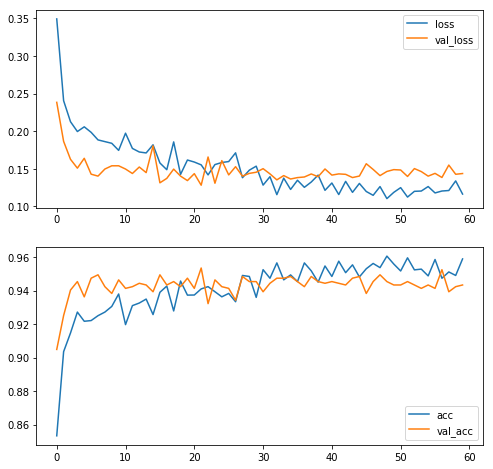

In [7]:
from mateosio import plot_training_histories
%matplotlib inline

plot_training_histories(history, history_pt2);

### Fine Tuning

In [8]:
# The VGG16 inside my model:

model.layers[0].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 120, 120, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 120, 120, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 120, 120, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 60, 60, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 60, 60, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 60, 60, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 30, 30, 128)       0         
__________

In [9]:
for layer in model.layers[0].layers:
    if 'block5' in layer.name: 
        layer.trainable = True
    else: 
        layer.trainable = False
        
# Set the vgg as a whole to trainable:        
model.layers[0].trainable = True   

In [10]:
[layer.trainable for layer in model.layers[0].layers]

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True]

Now we keep training the model. This time we will be updating the top few layers. We want to reduce the learning rate in order to keep them from 'flailing around'

At first the loss and accuracy get worse, but they will start improving soon enough.

In [11]:
model.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-5),
                     metrics=['acc'])

history_pt2 = model.fit_generator(train_generator,
                                  steps_per_epoch=30,
                                  epochs=30,
                                  validation_data=validation_generator,
                                  validation_steps=10)

model.save('vgg_unfrozen_convbase_30epochs.h5')

Epoch 1/30
30/30 [==============================] - 24s 794ms/step - loss: 0.1213 - acc: 0.9537 - val_loss: 0.1503 - val_acc: 0.9474
Epoch 2/30
30/30 [==============================] - 20s 665ms/step - loss: 0.1227 - acc: 0.9488 - val_loss: 0.1366 - val_acc: 0.9433
Epoch 3/30
30/30 [==============================] - 19s 644ms/step - loss: 0.1112 - acc: 0.9566 - val_loss: 0.1248 - val_acc: 0.9504
Epoch 4/30
30/30 [==============================] - 21s 714ms/step - loss: 0.1047 - acc: 0.9623 - val_loss: 0.1376 - val_acc: 0.9494
Epoch 5/30
30/30 [==============================] - 20s 661ms/step - loss: 0.1001 - acc: 0.9603 - val_loss: 0.1272 - val_acc: 0.9545
Epoch 6/30
30/30 [==============================] - 20s 662ms/step - loss: 0.1137 - acc: 0.9583 - val_loss: 0.1350 - val_acc: 0.9474
Epoch 7/30
30/30 [==============================] - 20s 671ms/step - loss: 0.1041 - acc: 0.9576 - val_loss: 0.1270 - val_acc: 0.9565
Epoch 8/30
30/30 [==============================] - 20s 661ms/step - 

In [12]:
model.compile(loss='binary_crossentropy',
                     optimizer=Adam(lr=1e-5),
                     metrics=['acc'])

history_pt3 = model.fit_generator(train_generator,
                                 steps_per_epoch=30,
                                 epochs=30,
                                 validation_data=validation_generator,
                                 validation_steps=10)

model.save('vgg_unfrozen_convbase_60epochs.h5')

Epoch 1/30
30/30 [==============================] - 23s 776ms/step - loss: 0.0449 - acc: 0.9842 - val_loss: 0.1455 - val_acc: 0.9676
Epoch 2/30
30/30 [==============================] - 20s 665ms/step - loss: 0.0468 - acc: 0.9830 - val_loss: 0.1358 - val_acc: 0.9615
Epoch 3/30
30/30 [==============================] - 20s 666ms/step - loss: 0.0515 - acc: 0.9792 - val_loss: 0.1424 - val_acc: 0.9555
Epoch 4/30
30/30 [==============================] - 21s 713ms/step - loss: 0.0317 - acc: 0.9887 - val_loss: 0.1398 - val_acc: 0.9605
Epoch 5/30
30/30 [==============================] - 20s 666ms/step - loss: 0.0421 - acc: 0.9830 - val_loss: 0.1336 - val_acc: 0.9656
Epoch 6/30
30/30 [==============================] - 20s 651ms/step - loss: 0.0487 - acc: 0.9823 - val_loss: 0.1366 - val_acc: 0.9636
Epoch 7/30
30/30 [==============================] - 20s 661ms/step - loss: 0.0424 - acc: 0.9860 - val_loss: 0.1341 - val_acc: 0.9696
Epoch 8/30
30/30 [==============================] - 20s 657ms/step - 

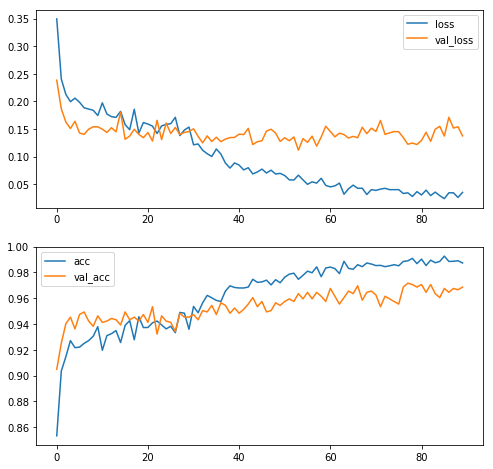

In [16]:
plot_training_histories(history, history_pt2, history_pt3);

Well, we did manage to get us some of that sweet sweet overfitting, didn't we? Notice how the training loss had gotten kind of stuck there until we lowered the learning rate. 

In this case, unfreezing the top of the convolutional stack didn't help us a lot, possibly because VGG16 was trained on ImageNet so the features it recognizes are already very applicable.

In any case, I feel that there is still some performance here that we can squeeze out. What do you say, we apply some more regularization??